Рынок заведений общественного питания Москвы

загрузим необходимые библиотеки

In [1]:
import pandas as pd               #библиотека для считывания файлов с данными
#import numpy as np                  #библиотека для оругЗления значений?
import matplotlib.pyplot as plt     #библиотека для графиков
#from scipy import stats as st       #библиотека для проверки гипотез
#import datetime 
#import math as mth
import seaborn as sns
#import plotly.express as px
#from plotly import graph_objects as go

import json # подключаем модуль для работы с JSON-форматом
from folium import Map, Choropleth # импортируем карту и хороплет

from folium import Map, Marker # импортируем карту и маркер
from folium.plugins import MarkerCluster # импортируем кластер

#sns.set(rc={'figure.figsize':(12, 8)})


выгрузим  и посмотрим общую информацию  

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

In [3]:
data.head(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [5]:
data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

- видим что во многих столбцах есть пропуски
- в некоторых столбцах можно заменить тип данных. можно заменить middle_avg_bill, middle_coffee_cup, seats на int64

проверим сколько всего заведений представленно

посмотрим сколько всего сетевых и не сетевых кафе где: 0 - несетевое, 1 - сетевое

In [6]:
data['chain'].value_counts()

0    5201
1    3205
Name: chain, dtype: int64

In [7]:
data['name'].count()

8406

посмотрим сколько уникальных сетевых заведений

In [8]:
data.query('chain == 1').nunique()

name                  762
category                8
address              2438
district                9
hours                 539
lat                  3175
lng                  3188
rating                 38
price                   4
avg_bill              438
middle_avg_bill       165
middle_coffee_cup      66
chain                   1
seats                 189
dtype: int64

- всего у нас 8406 заведений
- из них 5201 - не сетевое кафе
- 3205 - сетевых кафе
- в несетевых кафе все кафе должны быть уникальными даже если у них могут быть одинаковые названия
- в сетевых кафе видим что уникальных заведений 762 тк несколько заведений под одним названием

проверяем количество пропусков

In [9]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

в пропусках со временем работы придется смириться поделать ничего не сможем как и с ценой 
а вот где количество мест пропуски это возможно то что посадочных мест вообще нет

In [10]:
data['seats'].value_counts().sort_index()

0.0       136
1.0         4
2.0        15
3.0        13
4.0        25
         ... 
760.0       1
920.0       2
1040.0      4
1200.0      1
1288.0     11
Name: seats, Length: 229, dtype: int64

In [11]:
print('кол-во явных дубликатов =', data.duplicated().sum())

кол-во явных дубликатов = 0


<div class="alert alert-info">
приведем все значения кроме числовых к нижнему регистру

In [12]:
#data = data.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'O' else x)
data[['name', 'address']] = data[['name', 'address']].apply(lambda x: x.astype(str).str.lower())

In [13]:
data.duplicated(subset=['name', 'address']).sum()

4

<div class="alert alert-info">
    
- врятли заведения с одинаковыми названиями будут находиться на одной улице скорее всего это дубликаты/ удалим их
- Фильтруем датафрейм, чтобы оставить только уникальные строки c помощью ~

In [14]:
data.loc[data.duplicated(subset=['name', 'address'], keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
189,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",55.880327,37.530786,3.2,NaN,NaN,NaN,NaN,0,NaN
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2211,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3091,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


In [15]:
# Фильтруем датафрейм, чтобы оставить только уникальные строки c помощью ~
data = data [~ data.duplicated(subset=['name', 'address']) ]

In [16]:
data.duplicated(subset=['name', 'address']).sum()

0

Заменить тип данных на целочисленный с помощью метода astype() не можем так ка в данных есть пропуски, оставим пока так 

In [17]:
#data[['middle_avg_bill', 'middle_avg_bill', 'seats']] == data[['middle_avg_bill', 'middle_avg_bill', 'seats']].astype('int')

можно присвоить пропускам в стобцах 'seats', 'middle_avg_bill', 'middle_coffee_cup' значение '-1' чтобы поменять тип данных в этих столбцах на int

если что потом их дропнем или сделаем срез. но будем иметь ввиду что это пропуски тк значение не существующее 

In [18]:
#data[['seats', 'middle_avg_bill', 'middle_coffee_cup']] = data[['seats', 'middle_avg_bill', 'middle_coffee_cup']].fillna(-1).astype(int)

Создаем столбец street с названиями улиц из столбца с адресом.

In [19]:
data['street'] = [d.split(', ')[1] for d in data['address']]

Создаем столбец is_24_7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):

In [20]:
data['is_24_7'] = data['hours'].str.contains('ежедневно, круглосуточно') | data['hours'].str.contains('24/7')

- удалять данные с пропусками нет стал тк их очень много и повлияет на результат иследования
- заполнять их тоже пока не стал тк не понятно на что заполнить. решил оставить как есть.
- добалили новые столбцы с адресом и работой круглосуточно

# Шаг 3. Анализ данных

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.

выведем кол-во заведений по категориям

In [21]:
data.groupby('category').agg({'name' : 'count'}).sort_values(by='name', ascending=False).reset_index()

,category,name
0,кафе,2376
1,ресторан,2042
2,кофейня,1413
3,"бар,паб",764
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


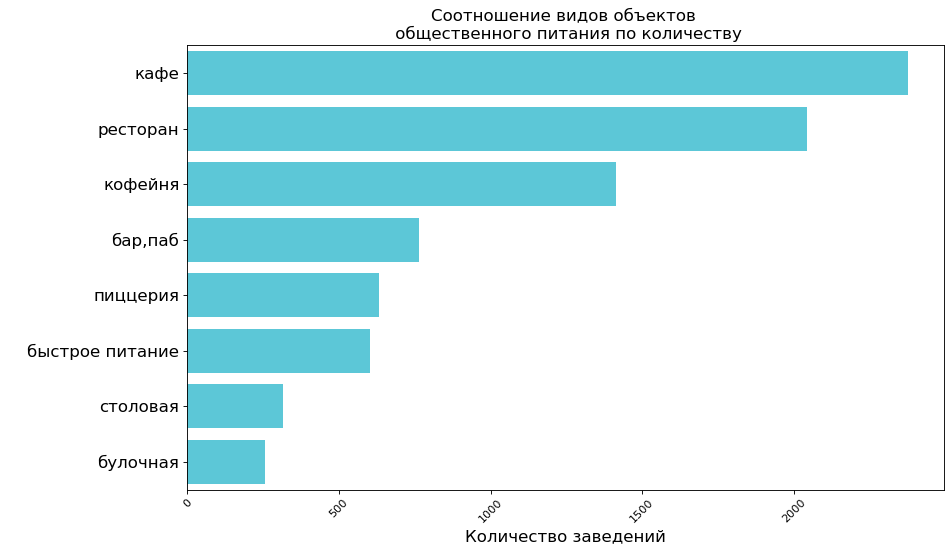

In [22]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='name', y='category', color='#47D6EC', data=data.groupby('category').agg({'name' : 'count'}).sort_values(by='name', ascending=False).reset_index())
plt.title('Cоотношение видов объектов \n общественного питания по количеству', size='15')
plt.xticks(rotation=45)
plt.yticks(size=15)
plt.xlabel('Количество заведений', size='15')
plt.ylabel(' ', size='15')
plt.tight_layout() # трик, чтобы включить подписи графиков в сохраненную картинку
plt.savefig('slide_0.png')
plt.show()

кафе, ресторанов и кофейн больше васего

Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.

In [23]:
data['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

посчитаем среднее количество мест по категориям заведений

In [24]:
data.groupby(by='category').agg({ 'seats':['mean', 'median']})

#data.pivot_table(index=['category'], values='seats', aggfunc=['median', 'mean'])

seats       
                       mean median
category                          
бар,паб          124.477516   82.0
булочная          89.385135   50.0
быстрое питание   98.891117   65.0
кафе              97.365653   60.0
кофейня          111.199734   80.0
пиццерия          94.496487   55.0
ресторан         121.892041   86.0
столовая          99.750000   75.5

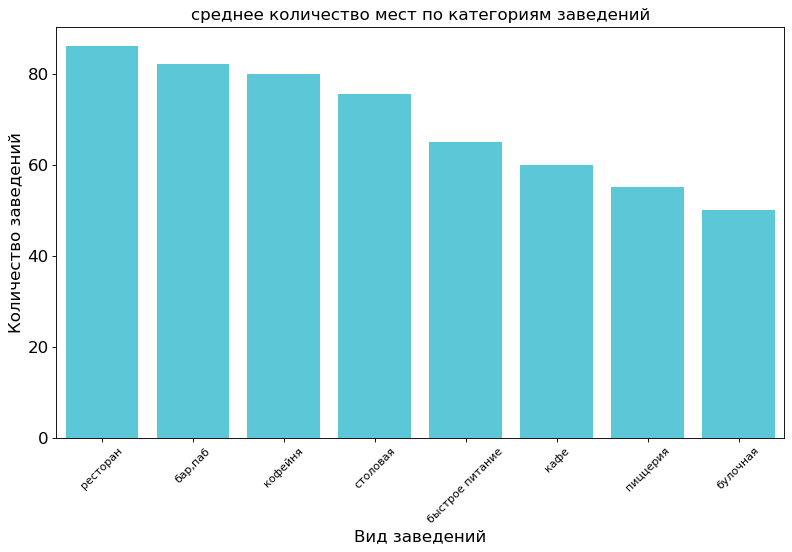

In [25]:
plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='category', y='seats', color='#47D6EC', data=data.groupby(by='category').agg({'seats':'median'}).sort_values(by='seats', ascending=False).reset_index())
plt.title('среднее количество мест по категориям заведений', size='15')
plt.xticks(rotation=45)
plt.yticks(size=15)
plt.xlabel('Вид заведений', size='15')
plt.ylabel('Количество заведений', size='15')
plt.tight_layout() # трик, чтобы включить подписи графиков в сохраненную картинку
plt.savefig('slide_1.png')
plt.show()

In [26]:
ranks = data.groupby("category")["seats"].median().fillna(0).sort_values()[::-1].index

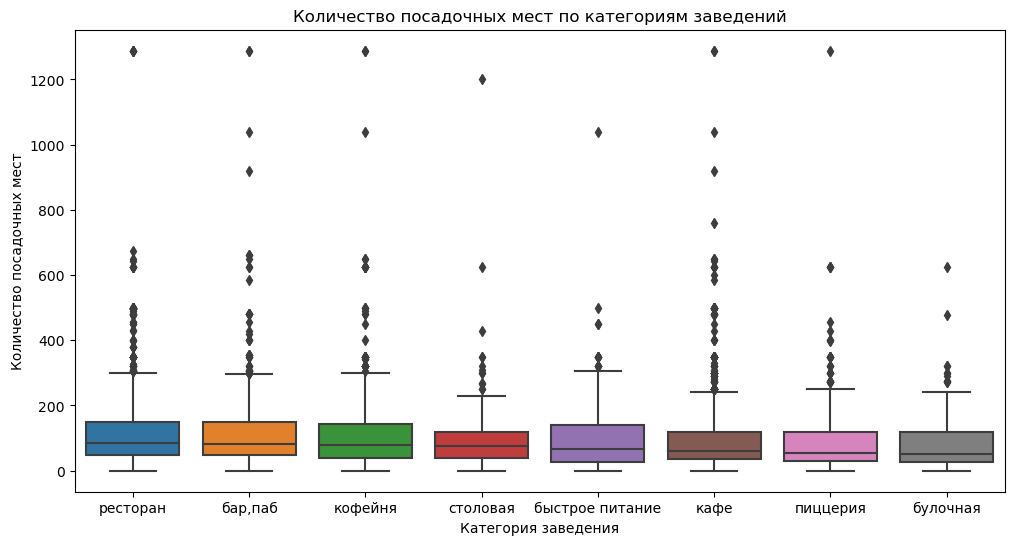

In [27]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data, x='category', y='seats', order = ranks)
#ax.set_ylim([0, 700]) 
plt.title('Количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.show()

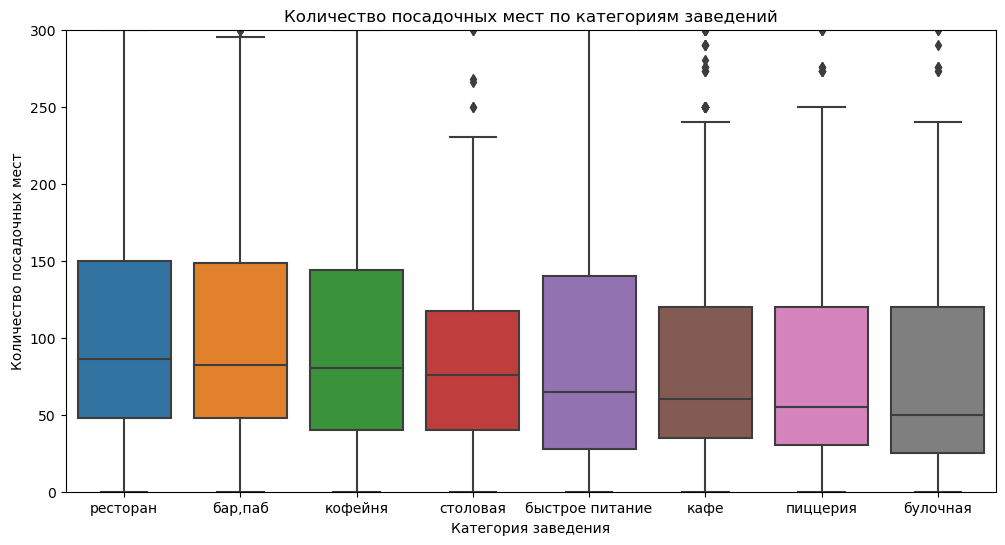

In [28]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=data, x='category', y='seats', order = ranks)
ax.set_ylim([0, 300]) 
plt.title('Количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.savefig('slide_2.png')
plt.show()



<div class="alert alert-info">
добавил сортировку по убыванию по медиане

похоже на выбросы, что это за заведения в которых по 1000 посадочных мест?
примем выбросы свыше 700
- в среднем в заведениях по 150 мест но есть исключения с большим количеством посадочных мест

Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [29]:
data['chain'].value_counts(normalize = True)

0    0.618781
1    0.381219
Name: chain, dtype: float64

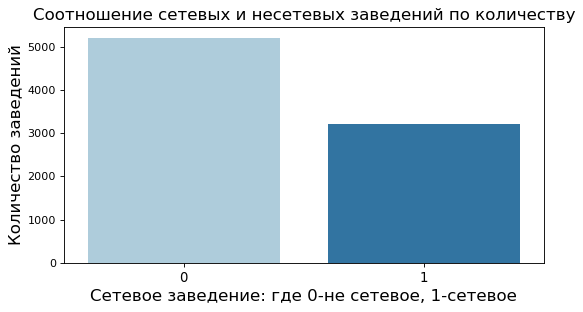

In [30]:
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='chain', y='name',palette='Paired', data=data.groupby('chain')['name'].count().reset_index().sort_values(by='chain', ascending=False))
plt.title('Cоотношение сетевых и несетевых заведений по количеству', size='15')
plt.xlabel('Сетевое заведение: где 0-не сетевое, 1-сетевое', size='15')
plt.ylabel('Количество заведений', size='15')
plt.xticks(size='12')
plt.tight_layout() # трик, чтобы включить подписи графиков в сохраненную картинку
plt.savefig('slide_3.png')
plt.show()

Несетевых заведений больше, из данных видно что примерно в 60% - несетевые 

<div class="alert alert-block alert-danger">
    
<b>Комментарий ревьюера:</b> Добавь, пожалуйста, здесь и дальше выводы по каждому вопросу задания. Так проект будет проще понять.
</div>

Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

In [31]:
data.groupby('category').agg({'chain': 'mean'}).sort_values(by='chain', ascending=False)

,chain
category,
булочная,0.613281
пиццерия,0.521327
кофейня,0.509554
быстрое питание,0.384743
ресторан,0.357003
кафе,0.327862
столовая,0.279365
"бар,паб",0.219895


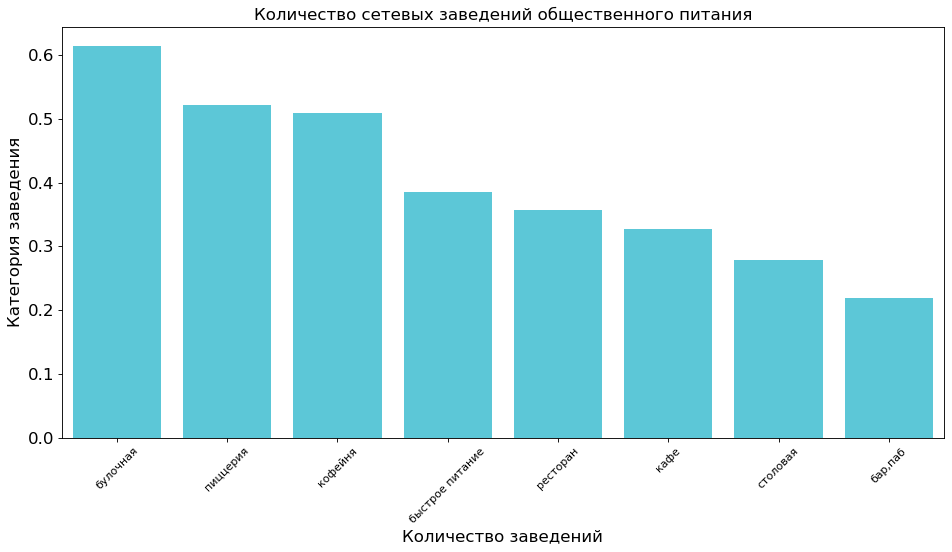

In [32]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='category', y='chain', color='#47D6EC', data=data.groupby('category').agg({'chain': 'mean'}).sort_values(by='chain', ascending=False).reset_index())
plt.title('Количество сетевых заведений общественного питания', size='15')
plt.xticks(rotation=45)
plt.yticks(size=15)
plt.xlabel('Количество заведений', size='15')
plt.ylabel('Категория заведения', size='15')
plt.tight_layout() # трик, чтобы включить подписи графиков в сохраненную картинку
plt.savefig('slide_4.png')
plt.show()

<div class="alert alert-info">
сетевыми чаще являются 
булочные, пицерии, кофейни

In [33]:
chain_data = data.pivot_table(index='category', columns='chain', values='name', aggfunc='count')
chain_data = chain_data.sort_values(by=1, ascending = True)
chain_data

chain,0,1
category,,
столовая,227,88
булочная,99,157
"бар,паб",596,168
быстрое питание,371,232
пиццерия,303,330
кофейня,693,720
ресторан,1313,729
кафе,1597,779


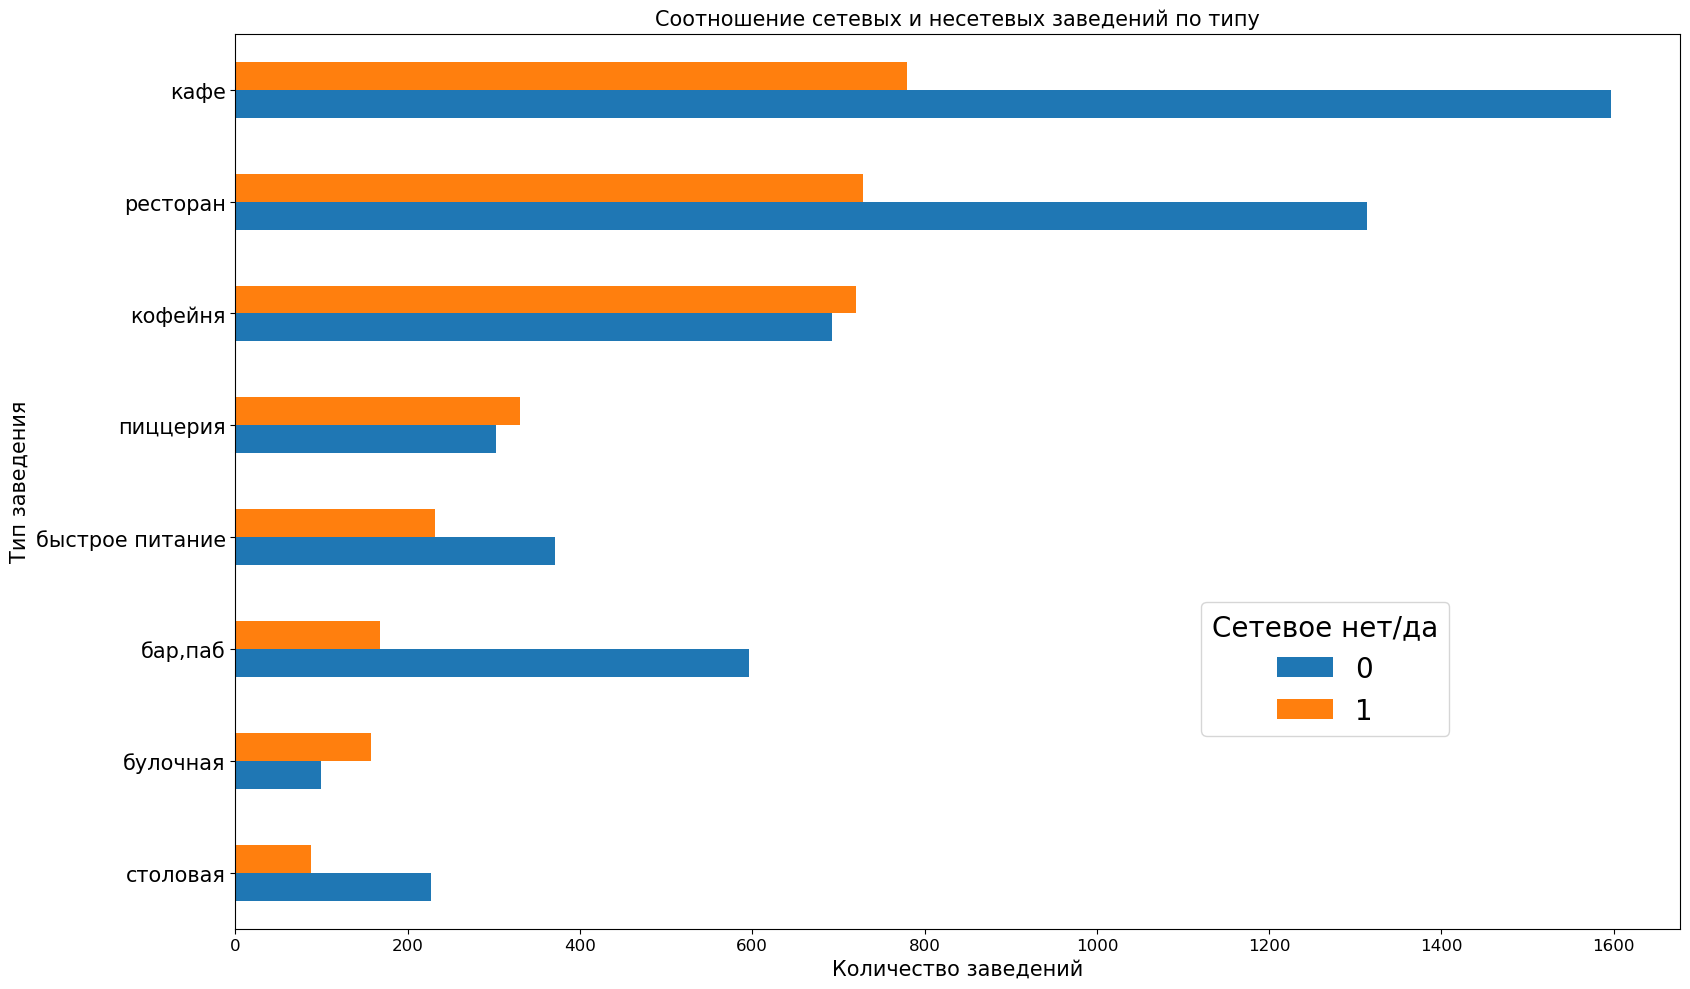

In [34]:
chain_data.plot(kind='barh',figsize = (17,10))
plt.title('Cоотношение сетевых и несетевых заведений по типу', size='15')
plt.xlabel('Количество заведений', size='15')
plt.ylabel('Тип заведения', size='15')
plt.xticks(size=12)
plt.yticks(size=15)
plt.legend(loc='lower right', bbox_to_anchor=(0.85, 0.20), fontsize = 20,title = 'Сетевое нет/да',title_fontsize = 20 )
plt.tight_layout() # трик, чтобы включить подписи графиков в сохраненную картинку
plt.savefig('slide_5.png')
plt.show()

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

In [35]:
df_chain_1 = data[data['chain'] == 1]

In [36]:
df_top_1 = (df_chain_1
          .pivot_table(index='name', values='category', aggfunc='count')
          .sort_values(by='category', ascending=False)
          .head(15)
            )
df_top_1

,category
name,
шоколадница,120
домино'с пицца,76
додо пицца,74
one price coffee,71
яндекс лавка,69
cofix,65
prime,50
хинкальная,44
кофепорт,42


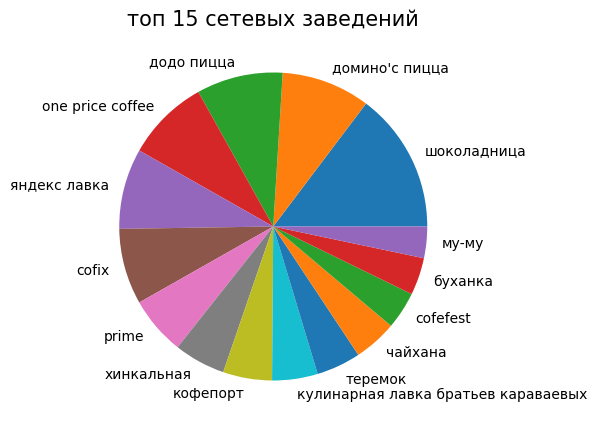

In [37]:
df_top_1['category'].plot(kind='pie',figsize = (10,5))
plt.title('топ 15 сетевых заведений', size='15')
plt.ylabel('')
plt.show()

In [38]:
df_top_1.index

Index(['шоколадница', 'домино'с пицца', 'додо пицца', 'one price coffee',
       'яндекс лавка', 'cofix', 'prime', 'хинкальная', 'кофепорт',
       'кулинарная лавка братьев караваевых', 'теремок', 'чайхана', 'cofefest',
       'буханка', 'му-му'],
      dtype='object', name='name')

In [39]:
top_15 = data[data['name'].isin(df_top_1.index)]

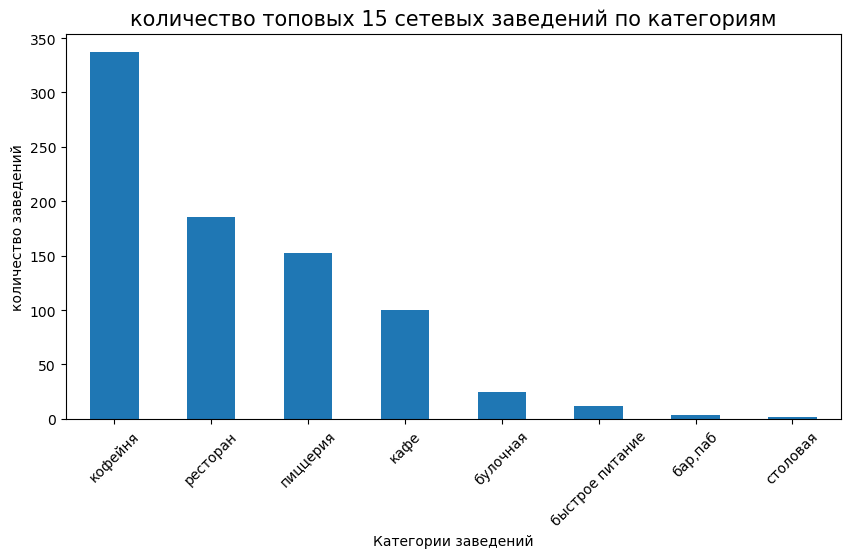

In [40]:
top_15.groupby('category')['name'].count().sort_values(ascending = False).plot(kind='bar',figsize = (10,5))
plt.xticks(rotation=45)
plt.title('количество топовых 15 сетевых заведений по категориям', size='15')
plt.xlabel('Категории заведений')
plt.ylabel('количество заведений')
plt.show()

<div class="alert alert-info">
большинство из топ 15 заведений относятся к кофейням

In [41]:
top_15[['name', 'category']].drop_duplicates().sort_values(by = 'name')

,name,category
5051,cofefest,кафе
46,cofefest,кофейня
52,cofix,кофейня
143,one price coffee,кофейня
5198,prime,кафе
1311,prime,ресторан
13,буханка,булочная
872,буханка,кофейня
6661,буханка,кафе
32,додо пицца,пиццерия


<div class="alert alert-info">
    категории для топ 15 заведений 

- тут видно какие сетевые кафе самые популярные

Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

сортируем по убыванию общее количеству заведений по районам и делаем список значений индекса

In [42]:
l = data.pivot_table(index='district', values='name', aggfunc='count').sort_values(by='name', ascending=False).index

In [43]:
l

Index(['Центральный административный округ', 'Северный административный округ',
       'Южный административный округ',
       'Северо-Восточный административный округ',
       'Западный административный округ', 'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Северо-Западный административный округ'],
      dtype='object', name='district')

In [44]:
pivot_dist = data.pivot_table(index='district', columns='category', values='name', aggfunc='count')
pivot_dist

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,53,25,71,272,105,72,160,40
Западный административный округ,50,37,62,238,150,71,218,24
Северный административный округ,68,39,58,234,193,77,188,41
Северо-Восточный административный округ,62,28,82,269,159,68,182,40
Северо-Западный административный округ,23,12,30,115,62,40,109,18
Центральный административный округ,364,50,87,464,428,113,670,66
Юго-Восточный административный округ,38,13,67,282,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Южный административный округ,68,25,85,264,131,73,202,44


задаем порядок в датасете по значению отсортированому в l

In [45]:
pivot_dist.reindex(l)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Центральный административный округ,364,50,87,464,428,113,670,66
Северный административный округ,68,39,58,234,193,77,188,41
Южный административный округ,68,25,85,264,131,73,202,44
Северо-Восточный административный округ,62,28,82,269,159,68,182,40
Западный административный округ,50,37,62,238,150,71,218,24
Восточный административный округ,53,25,71,272,105,72,160,40
Юго-Восточный административный округ,38,13,67,282,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Северо-Западный административный округ,23,12,30,115,62,40,109,18


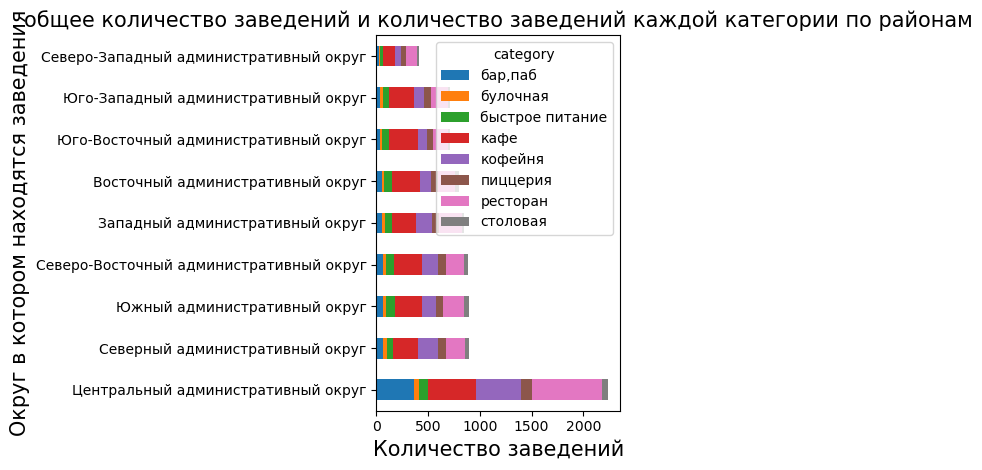

In [46]:
pivot_dist.reindex(l).plot(kind='barh', stacked=True)
plt.title('общее количество заведений и количество заведений каждой категории по районам', size='15')
plt.xlabel('Количество заведений', size='15')
plt.ylabel('Округ в котором находятся заведения', size='15')
plt.tight_layout()
plt.savefig('slide_6.png')
plt.show()

<div class="alert alert-info">
отсортировал график

в центральном округе больше всего заведений что логично и соотношение баров тоже выше всего

Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

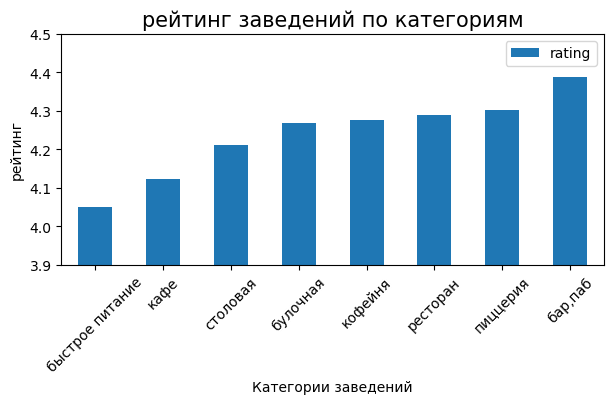

In [47]:
(data
    .pivot_table(index='category', values='rating', aggfunc='mean').sort_values(by='rating')
    .plot(kind='bar', figsize=(7, 3), ylim=(3.9, 4.5))
 
)
plt.title('рейтинг заведений по категориям', size='15')
plt.xlabel('Категории заведений')
plt.ylabel('рейтинг')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">
отсортировал график и ограничил по оси y

In [48]:
ranks = data.groupby("category")["rating"].mean().fillna(0).sort_values()[::-1].index

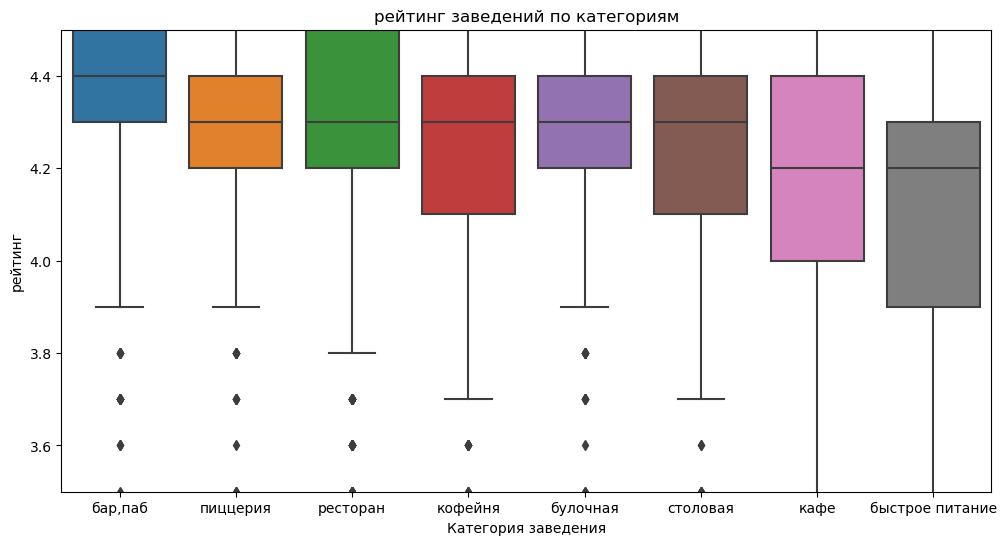

In [49]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data= data, x='category', y='rating', order=ranks)
ax.set_ylim([3.5, 4.5]) 
plt.title('рейтинг заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('рейтинг')
plt.show()

рейтинги не сильно различаются
рейтинг выше всего у баров
самый низкий рейтинг у заведений быстрого питания


Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы).

In [50]:
rating_df = data.groupby(by='district',  as_index=False).agg({'rating': 'mean'})
rating_df

,district,rating
0,Восточный административный округ,4.174185
1,Западный административный округ,4.181647
2,Северный административный округ,4.240980
3,Северо-Восточный административный округ,4.147978
4,Северо-Западный административный округ,4.208802
5,Центральный административный округ,4.377520
6,Юго-Восточный административный округ,4.101120
7,Юго-Западный административный округ,4.172920
8,Южный административный округ,4.184417


In [51]:
# подключаем модуль для работы с JSON-форматом 'admin_level_geomap.geojson'
#import json

# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'

<div class="alert alert-info">
не понимаю в чем тут дело почему у тебя не проходит код? 
такая ссылка именно в этой ячейки не открывается 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson' хотя в других проходит, 'https://code.s3.yandex.net/datasets/admin_level_geomap.geojson' тоже не работает.
    
- with open('admin_level_geomap.geojson', 'r') as f: - так открывается если файл помещен в папку с проектом
    
- '/datasets/admin_level_geomap.geojson' - так почему то у меня не открывается , даже если положить файл в папку datasets

In [ ]:
# импортируем карту и хороплет
#from folium import Map, Choropleth

# загружаем JSON-файл с границами округов Москвы
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m


Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
# импортируем карту и маркер
# from folium import Map, Marker
# импортируем кластер
# from folium.plugins import MarkerCluster

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles="Cartodb Positron")
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m2)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m2

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> Отлично, на карте можно легко рассмотреть нужную нам территорию.
    
</div>

Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

выведем топ 15 улиц по кол-ву заведений

In [ ]:
street_top = data.groupby(by='street',  as_index=False).agg({'name': 'count'}).sort_values(by='name', ascending =False).head(15)
#street_top = street_top.set_index('street')
street_top

соханим название улиц в список

In [ ]:
st_list = street_top['street'].to_list()
st_list

сделаем срез по улицам в сохраненом списке

In [ ]:
data_st_top = data[data['street'].isin(st_list)]
data_st_top

сделаем пивот по топ 15 улицам с количеством и разбивкой по категориям

In [ ]:
l1 = data_st_top.pivot_table(index='street', values='name', aggfunc='count').sort_values(by='name', ascending=False).index
l1

In [ ]:
pivot_street = data_st_top.pivot_table(index='street', columns='category', values='name', aggfunc='count')
pivot_street.reindex(l1)

In [ ]:
pivot_street.reindex(l1).plot(kind='barh', stacked=True)
plt.title('количество заведений каждой категории по популярным улицам', size='15')
plt.xlabel('Количество заведений', size='15')
plt.ylabel('Улица в которой находятся заведения', size='15')
plt.show()

<div class="alert alert-info">
- проспект мира самая популярная из топ 15 улиц
- на ней больше всего кафе, ресторанов и кафейнь

Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [ ]:
street_1 = (data
            .groupby(by='street',  as_index=False).agg({'name': 'count'})
            .sort_values(by='name', ascending =False)
            .query('name == 1')
           )

In [ ]:
st_list_1 = street_1['street'].to_list()

In [ ]:
data_st_1 = data[data['street'].isin(st_list_1)]

In [ ]:
data_st_1.info()

In [ ]:
data_st_1.head()

In [ ]:

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m_1str = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles="Cartodb Positron")
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m_1str)

# применяем функцию create_clusters() к каждой строке датафрейма
data_st_1.apply(create_clusters, axis=1)

# выводим карту
m_1str

сложно чтото сказать по эти заведениям не нашел ничего общего у них кроме того что некоторая информация пропущена

на этих улицах можно открыть кофейню тк у людей нехватка мест где можно попить кофе

Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [ ]:
dist_median_bill = data.pivot_table(index='district', values='middle_avg_bill', aggfunc='median').reset_index()

In [ ]:
dist_median_bill

In [ ]:
# создаём карту Москвы
m3 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=dist_median_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный чек заведений по районам',
).add_to(m3)

# выводим карту
m3

получили два самых дорогих района в москве это центр и запад

вывод:
по результам иследования можно сказать что 
- больше всего в москве кафе, ресторанов и кафеен
- в среднем посадочных мест 80
- не сетевых заведений больше примерно в 1.5 раза
- чаще всего сетевыми являются кафе, рестораны и кафеени
- в центральном округе больше всего заведений и в центральном округе сосредоточено большинство баров которые есть в москве
- меньше всего заведений в СЗАО , может нужно открывать там потому что меньше конкуренция
- самый низкий рейтинг у сетей быстрого питания
- выше всего рейтинг в районе ЦАОвозможно там лучше сервис или туда ходит другой контенгент людей
- на улицах дге больше всего заведений преобладают также кафе, рестораны и кафеени
- средний чек самый высокие в ЦАО и ЗАО. В ЗАО скорее всего там где элитные районы типа рублевки

# Шаг 4. Детализируем исследование: открытие кофейни

Ответьте на следующие вопросы:
- Сколько всего кофеен в датасете? 

In [ ]:
df_cafe = data.query('category == "кофейня"')

df_cafe.info()

- В каких районах их больше всего, каковы особенности их расположения?

In [ ]:
cafe_piv = df_cafe.groupby(by='district').agg({'name':'count'}).sort_values(by='name', ascending=False).reset_index()
cafe_piv

In [ ]:
# создаём карту Москвы
m4 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=cafe_piv,
    columns=['district', 'name'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='расположение кафеен по районам',
).add_to(m4)

# выводим карту
m4

- Есть ли круглосуточные кофейни?

In [ ]:
df_cafe['is_24_7'].value_counts().plot(kind='bar', figsize=(7, 3))
plt.title('количество кофеен работающие 24/7', size='15')
plt.xlabel('True-работают 24/7 \n False-не работают 24/7', size='15')
plt.ylabel('Количество кофеен', size='15')
plt.show()

- Какие у кофеен рейтинги? Как они распределяются по районам?

In [ ]:
cafe_rat = df_cafe.groupby(by='district').agg({'rating':'mean'}).sort_values(by='rating', ascending=False).reset_index()
cafe_rat

In [ ]:
# создаём карту Москвы
m5 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=cafe_rat,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='рейтинг кафеен по районам',
).add_to(m5)

# выводим карту
m5

- На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [ ]:
cafe_cup = df_cafe.groupby(by='district').agg({'middle_coffee_cup':'mean'}).sort_values(by='middle_coffee_cup', ascending=False).reset_index()
cafe_cup

взяли медианную цену

In [ ]:
# создаём карту Москвы
m6 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=cafe_cup,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='средняя цена за чашку кофе в кафейнях по районам',
).add_to(m6)

# выводим карту
m6

вывод
- всего кофеен 1413
- больше всего кофеен в ЦАО и на севере москвы. меньше всего в СЗАО
- круглосуточных кафеен очень мало всего около 50 на всю москву
- самый высокий рейтинг у кофеен в ЦАО и САО
- средняя цена за часку кофе варируется от 150 до 200 р в разных районах самые дорогие это в ЦАО (центр) ЗАО (тут элитные районы)  ЮЗАО (тут много студентов) примерно в 190р

<div class="alert alert-info">
При запуске новой кофейни можно выбрать ЦАО, ЗАО или ЮЗАО тк там самая высокая средняя стоимость за чашку кофе позволит бвстрее окупиться, но также там возможно дороже аренда.
    
также можно открыть в районе где наоборот мало кофеен там они будут пользоваться большим спросом напимер в СЗАО но нужно выбрать район с большим количесвом населения а не промышленый район СЗАО как раз подходит
    
если открывать в ЦАО то можно сделать крушласуточную работу тк таких кафеен очень мало а в ЦАО на них будет спрос

новая ссылка
https://disk.yandex.ru/i/FkSGqR2yYwAJNQ